In [1]:
import numpy as np
from my_ueg import my_ueg
from pyscf import gto, scf, cc

In [2]:
nocc = 7 # 7, 19, 27, 33, 57, 81, 93
rs_list = np.arange(1,5,0.2)
emf_list = np.empty_like(rs_list)
eccsd_list = np.empty_like(rs_list)
for i,rs in enumerate(rs_list):
    my_sys = my_ueg(rs, (nocc, nocc), np.sqrt(2)) #np.sqrt(2))
    print('num kpts: ',my_sys.nkpts)
    h0 = my_sys.madelung() / 2
    h1 = my_sys.get_h1_real()
    cderi = my_sys.get_cderi_real()

    mol = gto.M()
    mol.nelectron = my_sys.nparticle
    mol.nao = my_sys.nkpts
    mol.incore_anyway = True
    mol.max_memory = 20000
    mol.verbose = 4

    dm = np.zeros((my_sys.nkpts,my_sys.nkpts))
    dm[:nocc,:nocc] = np.eye(nocc) * 2.0

    mf = scf.RHF(mol).density_fit()
    mf.energy_nuc = lambda *args: h0
    mf.get_hcore = lambda *args: h1
    mf.get_ovlp = lambda *args: np.eye(my_sys.nkpts)
    mf._cderi = cderi
    mf.init_guess = "1e"
    mf.max_cycle = -1
    escf = mf.kernel(dm0=dm)
    emf_list[i] = escf

    mf.mo_coeff = np.eye(my_sys.nkpts)

    # print(f"escf: {escf}")
    # print(f"escf per electron: {escf/my_sys.nparticle}")

    mycc = cc.RCCSD(mf)
    mycc.max_cycle = 100
    mycc.conv_tol = 1e-7
    mycc.kernel()
    eccsd_list[i] = mycc.e_tot

    # et = mycc.ccsd_t()
    # print("CCSD energy", mycc.e_corr)
    # print("CCSD energy per electron", mycc.e_corr / my_sys.nparticle)
    # print("CCSD(T) energy", et)
    # print("CCSD(T) energy per electron", et / my_sys.nparticle)

num kpts:  19


******** <class 'pyscf.df.df_jk.DFRHF'> ********
method = DFRHF
initial guess = 1e
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
diis_damp = 0
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = -1
direct_scf = False
chkfile to save SCF result = /tmp/tmp5pcklfer
max_memory 20000 MB (current use 123 MB)
Set gradient conv threshold to 3.16228e-05
init E= 8.49148146743777
  HOMO = 1.04145818327265  LUMO = 2.32324526529525
SCF not converged.
SCF energy = 8.49148146743777

******** <class 'pyscf.cc.dfccsd.RCCSD'> ********
CC2 = 0
CCSD nocc = 7, nmo = 19
max_cycle = 100
direct = 0
conv_tol = 1e-07
conv_tol_normt = 1e-05
diis_space = 6
diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 20000 MB (current use 124 MB)
Init t2, MP2 energy = 8.11699308199585  E_corr(MP2) -0.374488385441918
Init E_corr(RCCSD) = -0.374488385441919
cycle = 1  E_corr(RCCSD) = -0.233706628303708  dE = 0.14078175

Overwritten attributes  get_ovlp get_hcore energy_nuc  of <class 'pyscf.df.df_jk.DFRHF'>


cycle = 2  E_corr(RCCSD) = -0.294796808642051  dE = -0.0610901803  norm(t1,t2) = 0.0390142
cycle = 3  E_corr(RCCSD) = -0.276436461619712  dE = 0.018360347  norm(t1,t2) = 0.0166986
cycle = 4  E_corr(RCCSD) = -0.276492710722161  dE = -5.62491024e-05  norm(t1,t2) = 7.13585e-05
cycle = 5  E_corr(RCCSD) = -0.276499060608661  dE = -6.3498865e-06  norm(t1,t2) = 7.17236e-06
cycle = 6  E_corr(RCCSD) = -0.276499450074825  dE = -3.89466164e-07  norm(t1,t2) = 3.75654e-07
cycle = 7  E_corr(RCCSD) = -0.276499419546035  dE = 3.05287902e-08  norm(t1,t2) = 6.18114e-08
RCCSD converged
E(RCCSD) = 8.214982047891734  E_corr = -0.2764994195460349
num kpts:  19


******** <class 'pyscf.df.df_jk.DFRHF'> ********
method = DFRHF
initial guess = 1e
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
diis_damp = 0
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = -1
direct_scf = False
chkfile to save SCF result = /tmp/tmpymxzd2kd
max_mem

In [6]:
rs_list2 = np.arange(5,7,0.2)
emf_list2 = np.empty_like(rs_list2)
eccsd_list2 = np.empty_like(rs_list2)
for i,rs in enumerate(rs_list2):
    my_sys = my_ueg(rs, (nocc, nocc), np.sqrt(2)) #np.sqrt(2))
    print('num kpts: ',my_sys.nkpts)
    h0 = my_sys.madelung() / 2
    h1 = my_sys.get_h1_real()
    cderi = my_sys.get_cderi_real()

    mol = gto.M()
    mol.nelectron = my_sys.nparticle
    mol.nao = my_sys.nkpts
    mol.incore_anyway = True
    mol.max_memory = 20000
    mol.verbose = 4

    dm = np.zeros((my_sys.nkpts,my_sys.nkpts))
    dm[:nocc,:nocc] = np.eye(nocc) * 2.0

    mf = scf.RHF(mol).density_fit()
    mf.energy_nuc = lambda *args: h0
    mf.get_hcore = lambda *args: h1
    mf.get_ovlp = lambda *args: np.eye(my_sys.nkpts)
    mf._cderi = cderi
    mf.init_guess = "1e"
    mf.max_cycle = -1
    escf = mf.kernel(dm0=dm)
    emf_list2[i] = escf

    mf.mo_coeff = np.eye(my_sys.nkpts)

    # print(f"escf: {escf}")
    # print(f"escf per electron: {escf/my_sys.nparticle}")

    mycc = cc.RCCSD(mf)
    mycc.max_cycle = 100
    mycc.conv_tol = 1e-7
    mycc.kernel()
    eccsd_list2[i] = mycc.e_tot

num kpts:  19


******** <class 'pyscf.df.df_jk.DFRHF'> ********
method = DFRHF
initial guess = 1e
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
diis_damp = 0
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = -1
direct_scf = False
chkfile to save SCF result = /tmp/tmpmdss2vd9
max_memory 20000 MB (current use 156 MB)
Set gradient conv threshold to 3.16228e-05
init E= -0.81254853028218
  HOMO = -0.000945431992947096  LUMO = 0.0461749157640941
SCF not converged.
SCF energy = -0.81254853028218

******** <class 'pyscf.cc.dfccsd.RCCSD'> ********
CC2 = 0
CCSD nocc = 7, nmo = 19
max_cycle = 100
direct = 0
conv_tol = 1e-07
conv_tol_normt = 1e-05
diis_space = 6
diis_start_cycle = 0
diis_start_energy_diff = 1e+09
max_memory 20000 MB (current use 156 MB)
Init t2, MP2 energy = -1.21892320249  E_corr(MP2) -0.406374672207821
Init E_corr(RCCSD) = -0.406374672207818
cycle = 1  E_corr(RCCSD) = 0.746287525038705  dE = 1.15

In [7]:
rs_list_both = np.hstack([rs_list,rs_list2])
emf_list_both = np.hstack([emf_list,emf_list2])
eccsd_list_both = np.hstack([eccsd_list,eccsd_list2])

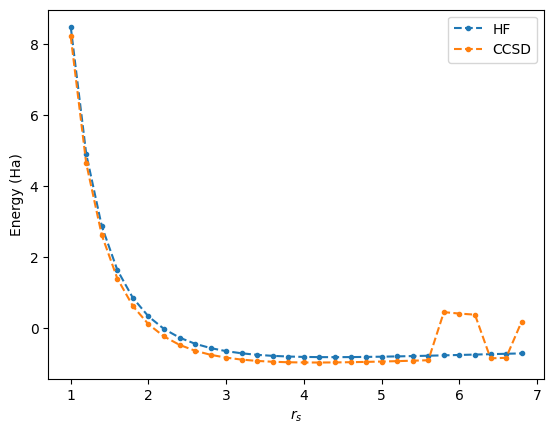

In [8]:
from matplotlib import pyplot as plt
plt.plot(rs_list_both,emf_list_both,'.--',color='C0',label='HF')
plt.plot(rs_list_both,eccsd_list_both,'.--',color='C1',label='CCSD')
plt.xlabel('$r_s$')
plt.ylabel('Energy (Ha)')
plt.legend()
plt.show()

In [18]:
mask1 = rs_list_both > 3.4
mask2 = rs_list_both < 5
rs_list_both[mask1*mask2]

array([3.6, 3.8, 4. , 4.2, 4.4, 4.6, 4.8])

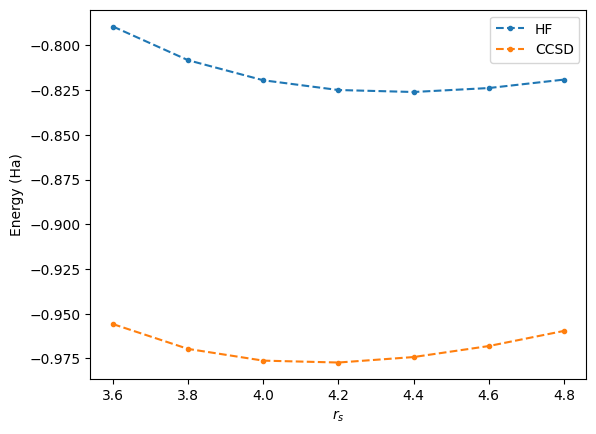

In [19]:
from matplotlib import pyplot as plt
plt.plot(rs_list_both[mask1*mask2],emf_list_both[mask1*mask2],'.--',color='C0',label='HF')
plt.plot(rs_list_both[mask1*mask2],eccsd_list_both[mask1*mask2],'.--',color='C1',label='CCSD')
plt.xlabel('$r_s$')
plt.ylabel('Energy (Ha)')
plt.legend()
plt.show()